# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how='outer')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"] != "g989"]
cleaned_data.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
453,j913,10,44.497162,0,Ramicane,Female,4,17
1241,w167,5,48.786272,0,Placebo,Female,6,28
1385,j296,0,45.000000,0,Ceftamin,Female,24,30
1291,a699,10,47.867376,0,Propriva,Female,5,28
64,f993,5,46.395760,0,Naftisol,Male,21,28


In [10]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
tumor_mean = cleaned_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_errors = cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#tumor_df = cleaned_data.groupby(cleaned_data["Drug Regimen"])


# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Mean" : tumor_mean,
                       "Median" : tumor_median,"Variance" : tumor_var,
                       "STD Deviation" : tumor_std,"SEM)" 
                        : tumor_errors})
print(tumor_df)

                   Mean     Median   Variance  STD Deviation      SEM)
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

In [42]:
# Group data by Drug Regime

drug_regimen_groups = cleaned_data.groupby(["Drug Regimen"])

mouse_counts = drug_regimen_groups["Timepoint"].count()



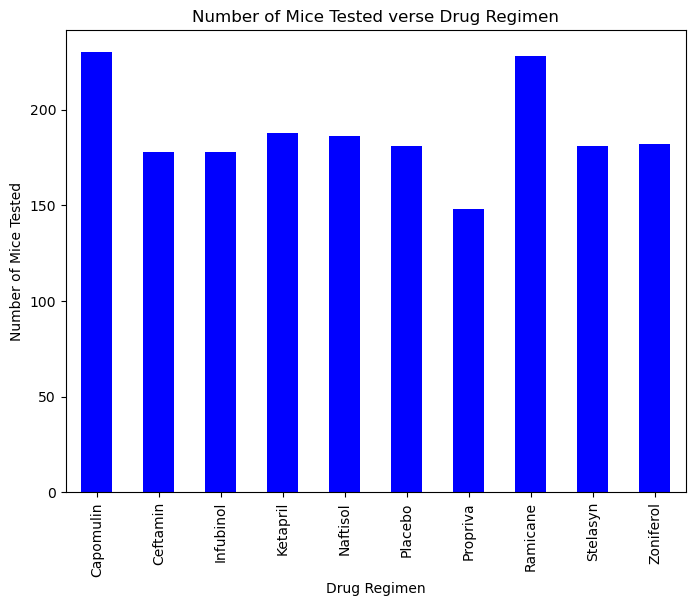

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_counts = mouse_counts.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Number of Mice Tested verse Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Number of Mice Tested")
plt.show()


In [53]:
# Create Data for ploting by pyplot
cleaned_for_pyplot = cleaned_data.groupby(["Drug Regimen"]).count()
cleaned_for_pyplot = cleaned_for_pyplot.reset_index()
cleaned_for_pyplot.sample(5)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
4,Naftisol,186,186,186,186,186,186,186
9,Zoniferol,182,182,182,182,182,182,182
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
1,Ceftamin,178,178,178,178,178,178,178


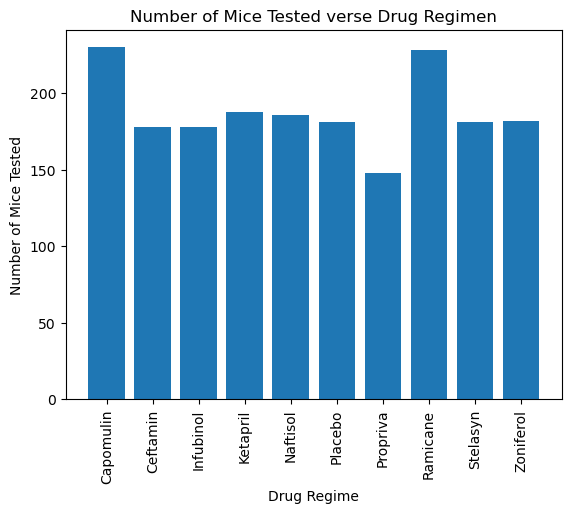

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(cleaned_for_pyplot["Drug Regimen"], cleaned_for_pyplot["Timepoint"])
plt.xlabel("Drug Regime")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested verse Drug Regimen")
plt.xticks(rotation=90)
plt.show()


In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_data["Sex"].value_counts()


TypeError: not enough arguments for format string

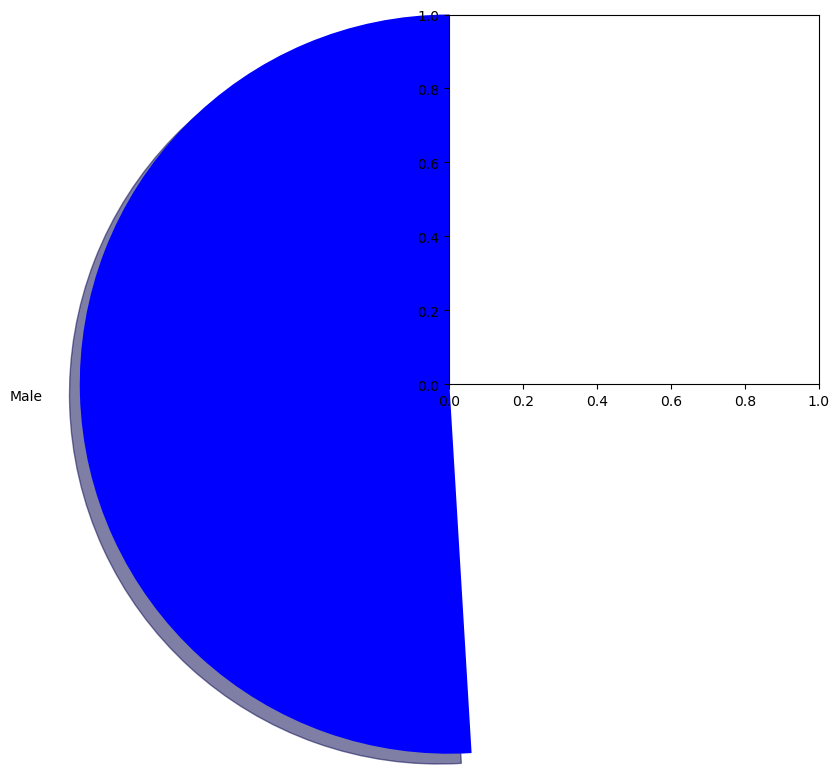

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "Orange"]

plt.pie(sex, colors=colors, labels=labels, shadow=True, startangle= 90, autopct="%1.1f%^")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


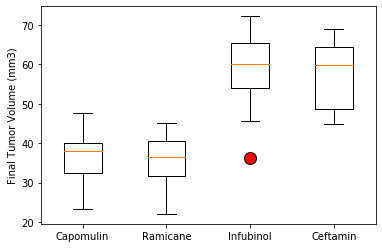

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

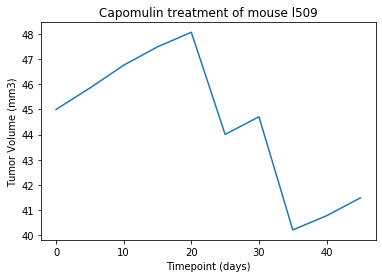

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



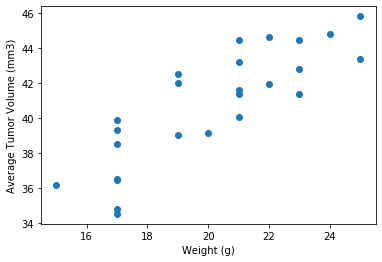

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


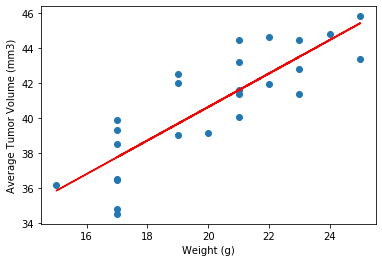

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

